## Accuracy & Error Rate

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

In [6]:
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [7]:
sum(y_true == y_pre) / len(y_true)

0.75

In [8]:
accuracy_score(y_true, y_pred)

0.75

## 불균일한 데이터의 처리 
ex) 하버드 입학 지원자 합격률 2% 이라고 하면, 전체 다 불합격 예측하면<br>
정확도 98%

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [10]:
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [16]:
sum((y_pred ==1 ) & (y_pred==y_true)) / sum(y_pred)

0.5

In [15]:
precision_score(y_true, y_pred)

0.5

근데 precision_score 에 average="binary" <br>
말고 multiclass문제에서도 쓸 수 있음. <br>

In [23]:
y_ture = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

### Sensitivity

In [24]:
from sklearn.metrics import recall_score

In [25]:
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [26]:
sum((y_true ==1) & (y_pred == y_true)) / sum(y_true)

1.0

In [27]:
recall_score(y_true, y_pred)

1.0

In [28]:
recall_score(y_true, y_pred, average="macroe")

ValueError: average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')

## F1 Score

In [29]:
from sklearn.metrics import f1_score
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [30]:
pre = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [31]:
2*(pre*rec) / (pre+rec)

0.6666666666666666

In [32]:
f1_score(y_true, y_pred)

0.6666666666666666

## Precision Recall Curce

In [37]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8]) #이거 prediction score를 넣는것
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [38]:
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [39]:
recall 

array([1. , 0.5, 0.5, 0. ])

In [41]:
thresholds #positive 되는 비율 계속 올려 주는 것. 

array([0.35, 0.4 , 0.8 ])

## Precision Classification Report

In [42]:
from sklearn.metrics import classification_report

## Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

In [44]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

## Logistic Regression with Scikit-Learn

penalty = l1 or l2<br>
tol = 언제 종료 할건지<br>
solver = 어떤식으로 해답을 얻을 것인지. 목적에 따라 적용되는게 조금 다름<br>

solver = 

In [45]:
import pandas as pd

In [50]:
!wget http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt

--2018-09-09 20:43:17--  http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt
Resolving www-stat.wharton.upenn.edu (www-stat.wharton.upenn.edu)... 128.91.91.176
Connecting to www-stat.wharton.upenn.edu (www-stat.wharton.upenn.edu)|128.91.91.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611090 (1.5M) [text/plain]
Saving to: ‘uva.txt’

uva.txt             100%[===================>]   1.54M  31.4KB/s    in 23s     

2018-09-09 20:43:41 (69.2 KB/s) - ‘uva.txt’ saved [1611090/1611090]



In [51]:
data_url= "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
data_url= "./uva.txt"

dataframe = pd.read_table(data_url)

In [52]:
dataframe[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [53]:
dataframe.shape

(19583, 11)

In [54]:
dataframe.dtypes

who                      object
Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Country                  object
Education Attainment     object
Major Occupation         object
Marital Status           object
Years on Internet        object
dtype: object

In [56]:
dataframe["Marital Status"].unique()

array(['Other', 'Married', 'Single', 'Divorced', 'Widowed', nan,
       'Separated'], dtype=object)

In [57]:
dataframe.shape

(19583, 11)

In [61]:
#dataframe.pop('who') #없애면서 뽑아줌
dataframe.pop("Country")
dataframe.pop("Years on Internet")

dataframe.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [63]:
dataframe["Gender"] = dataframe["Gender"].astype("category")
dataframe.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income          object
Sexual Preference         object
Education Attainment      object
Major Occupation          object
Marital Status            object
dtype: object

In [64]:
for col in ['Household Income', 'Sexual Preference', 'Education Attainment', 'Major Occupation', "Marital Status"]:
    dataframe[col] = dataframe[col].astype('category')
dataframe.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [66]:
dataframe_modified = pd.get_dummies(dataframe)
dataframe_modified[:5]

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [67]:
dataframe_modified.shape

(19583, 38)

In [68]:
dataframe_modified.isnull().sum()
#나이에 missing value 너무 많음

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

In [71]:
dataframe_modified.loc[
    pd.isnull(dataframe_modified["Age"]), "Age" 
] = dataframe_modified["Age"].mean()

In [75]:
x_data  = dataframe_modified.iloc[:, 1:].as_matrix()
y_data  = dataframe_modified.iloc[:, 0].as_matrix().reshape(-1, 1)

In [77]:
from sklearn import preprocessing

In [78]:
min_max_scaler = preprocessing.MinMaxScaler()
x_data= min_max_scaler.fit_transform(x_data)


In [83]:
import numpy as np
training_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0]*80))
test_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0]*0.2))

In [84]:
x_training, x_test = x_data[training_idx, :], x_data[test_idx, :]
y_training, y_test = y_data[training_idx, :], y_data[test_idx, :]

x_training.shape, x_test.shape

((1566640, 37), (3916, 37))

In [88]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(fit_intercept = True)
logreg.fit(x_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
logreg.predict(x_test[:3])

array([0, 0, 0])

In [96]:
logreg.predict_proba(x_test[:3])
#0일 확률과 1일 확률

#logreg.predict_proba(x_test[:3])[:, 1] >0.2
#이렇게 하면, 1일 확률이 0.2보다 크면 True로 하자는 거야. 

array([[0.7653847 , 0.2346153 ],
       [0.63911891, 0.36088109],
       [0.74771342, 0.25228658]])

In [ ]:
x_test.shape

In [90]:
y_test.shape

(3916, 1)

In [97]:
logreg.predict(x_test) == y_test.flatten()

array([ True, False,  True, ...,  True,  True,  True])

## 근데 항상 y data가 비율이 어떤지 check 해야 함 

In [101]:
sum(y_data.flatten() ==1), sum(y_data.flatten() ==0)
#불균형 데이터 셋인것 알 수 있겠지. 

(4962, 14621)

일단 Accuracy부터 보자. 

In [103]:
logreg.predict(x_test) == y_test.flatten()

array([ True, False,  True, ...,  True,  True,  True])

In [106]:
sum(logreg.predict(x_test) == y_test.flatten()) / len(y_test)
#Accuracy 75% 인 것

0.757150153217569

In [107]:
logreg.predict_proba(x_test)

array([[0.7653847 , 0.2346153 ],
       [0.63911891, 0.36088109],
       [0.74771342, 0.25228658],
       ...,
       [0.65520015, 0.34479985],
       [0.56023165, 0.43976835],
       [0.87416666, 0.12583334]])

In [110]:
logreg.decision_function(x_test[:5])
#0보다 작거나, 0보다 크거나 이렇게 나오는 것. 
#True, False로 예측 하는 것. 

array([-1.18243145, -0.57154202, -1.0864541 , -2.74277181, -0.02703716])

# ROC Curve

In [113]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [114]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
#logistic regression predict_proba(x_test)에서 나온거를 scores에 넣은 거야. 
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label =2)
#positive label이 뭔지를 주는거야. 여기서는 2가 positive

In [115]:
fpr

array([0. , 0.5, 0.5, 1. ])

In [116]:
tpr

array([0.5, 0.5, 1. , 1. ])

In [117]:
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

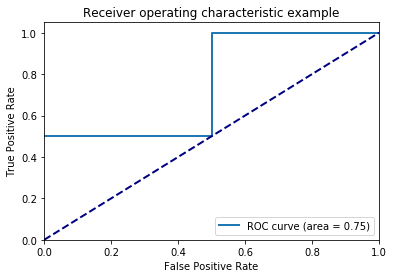

In [118]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, 
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()